## Cálculo de métricas temporales
###### Proyecto: 

*Estudio de factibilidad y coste-efectividad del uso telemedicina con un equipo multidisciplinar para prevención de caídas en la enfermedad de Parkinson*

###### Autores:
José Luis Garrido Labrador<br>José Miguel Ramírez Sanz

In [80]:
%matplotlib inline
import joblib
import cv2
import numpy as np
import os
import cv2
import imageProcesor as ip
from datetime import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import zlib
from extraOpt import opt as opt_
from pynvml.smi import nvidia_smi
import gc
import torch

import pickle as pk

import warnings
warnings.filterwarnings('ignore')

In [4]:
path = "./videos"

In [5]:
ANONIMIZE = True
ANON_ALG = ip.pixel
ANON_FACTOR = 15
BRIGHT = True
CONTRAST = True
OUTPUT = "output"

In [6]:
def pruebasTemporales(video, mode=0, code=0):
    video = cv2.VideoCapture(os.path.join(path,video))
    result = []
    bpos = None
    while True:
        s, frame = video.read()
        if s:
            p = procesaFrame
            if mode == 1:
                p = procesaFramePos
            elif mode == 2:
                p = procesaFramePre
            elif mode == 3:
                p = procesaFrameTodo
            r, pos = p(frame, code, bpos)
            bpos = pos
            result.append(r)
        else:
            break
    return result

def procesaFrame(img, code=0, bpos=None):
    img = zlib.compress(cv2.imencode('.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 95])[1])
    pos = None
    f = dt.now().timestamp()*1000
    img = cv2.imdecode(np.frombuffer(zlib.decompress(img), dtype=np.uint8), 1)
    try:
        pass
        #img = ip.anonimize(img, ANON_ALG, ANON_FACTOR)
        #img = ip.repair_bright_and_contrast(img, BRIGHT, CONTRAST)
        #_, img, pos = opt_(code, img, bpos)
        if code != 0:
            cv2.imwrite(os.path.join(OUTPUT,"0.jpg"), img)
    except:
        pass
    l = dt.now().timestamp()*1000
    return l-f, pos

def procesaFramePos(img, code=0, bpos=None):
    img = zlib.compress(cv2.imencode('.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 95])[1])
    pos = None
    f = dt.now().timestamp()*1000
    img = cv2.imdecode(np.frombuffer(zlib.decompress(img), dtype=np.uint8), 1)
    try:
        pass
        #img = ip.anonimize(img, ANON_ALG, ANON_FACTOR)
        #img = ip.repair_bright_and_contrast(img, BRIGHT, CONTRAST)
        _, img, pos = opt_(code, img, bpos)
        if code != 0:
            cv2.imwrite(os.path.join(OUTPUT,"0.jpg"), img)
    except:
        pass
    l = dt.now().timestamp()*1000
    return l-f, pos

def procesaFramePre(img, code=0, bpos=None):
    img = zlib.compress(cv2.imencode('.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 95])[1])
    pos = None
    f = dt.now().timestamp()*1000
    img = cv2.imdecode(np.frombuffer(zlib.decompress(img), dtype=np.uint8), 1)
    try:
        pass
        img = ip.anonimize(img, ANON_ALG, ANON_FACTOR)
        img = ip.repair_bright_and_contrast(img, BRIGHT, CONTRAST)
        #_, img, pos = opt_(code, img, bpos)
        if code != 0:
            cv2.imwrite(os.path.join(OUTPUT,"0.jpg"), img)
    except:
        pass
    l = dt.now().timestamp()*1000
    return l-f, pos

def procesaFrameTodo(img, code=0, bpos=None):
    img = zlib.compress(cv2.imencode('.jpg', img, [int(cv2.IMWRITE_JPEG_QUALITY), 95])[1])
    pos = None
    f = dt.now().timestamp()*1000
    img = cv2.imdecode(np.frombuffer(zlib.decompress(img), dtype=np.uint8), 1)
    try:
        pass
        img = ip.anonimize(img, ANON_ALG, ANON_FACTOR)
        img = ip.repair_bright_and_contrast(img, BRIGHT, CONTRAST)
        _, img, pos = opt_(code, img, bpos)
        if code != 0:
            cv2.imwrite(os.path.join(OUTPUT,"0.jpg"), img)
    except:
        pass
    l = dt.now().timestamp()*1000
    return l-f, pos

In [7]:
def borrar():
    nvsmi = nvidia_smi.getInstance()
    nvsmi.DeviceQuery('memory.free, memory.total')
    torch.cuda.empty_cache()
    gc.collect()


In [ ]:
medidas_sinaccion = []
for i in range(10):
    results = joblib.Parallel(n_jobs=10)(joblib.delayed(pruebasTemporales)(i,0,0) for i in os.listdir(path))
    medidas_sinaccion.append(results)
    borrar()    

with open("medidas_sinaccion.pkl","wb") as f:
    pk.dump(medidas_sinaccion,f)

guardado_sinaccion = []
for i in range(10):
    results = joblib.Parallel(n_jobs=10)(joblib.delayed(pruebasTemporales)(i,0,1) for i in os.listdir(path))
    guardado_sinaccion.append(results)
    borrar()
    
with open("guardado_sinaccion.pkl","wb") as f:
    pk.dump(guardado_sinaccion,f)

medidas_pre = []
for i in range(10):
    results = joblib.Parallel(n_jobs=10)(joblib.delayed(pruebasTemporales)(i,2,0) for i in os.listdir(path))
    medidas_pre.append(results)
    borrar()
    
with open("medidas_pre.pkl","wb") as f:
    pk.dump(medidas_pre,f)
    
guardado_pre = []
for i in range(10):
    results = joblib.Parallel(n_jobs=10)(joblib.delayed(pruebasTemporales)(i,2,1) for i in os.listdir(path))
    guardado_pre.append(results)
    borrar()
    
with open("guardado_pre.pkl","wb") as f:
    pk.dump(guardado_pre,f)

In [ ]:
medidas_pos = []
for i in range(10):
    results = joblib.Parallel(n_jobs=10)(joblib.delayed(pruebasTemporales)(i,1,0) for i in os.listdir(path))
    medidas_pos.append(results)
    borrar()
    
with open("medidas_pos.pkl","wb") as f:
    pk.dump(medidas_pos,f)
    
guardado_pos = []
for i in range(10):
    results = joblib.Parallel(n_jobs=10)(joblib.delayed(pruebasTemporales)(i,1,1) for i in os.listdir(path))
    guardado_pos.append(results)
    borrar()
    
with open("guardado_pos.pkl","wb") as f:
    pk.dump(guardado_pos,f)
    
medidas_total = []
for i in range(10):
    results = joblib.Parallel(n_jobs=10)(joblib.delayed(pruebasTemporales)(i,3,0) for i in os.listdir(path))
    medidas_total.append(results)
    borrar()
    
with open("medidas_total.pkl","wb") as f:
    pk.dump(medidas_total,f)
    
guardado_total = []
for i in range(10):
    results = joblib.Parallel(n_jobs=10)(joblib.delayed(pruebasTemporales)(i,3,1) for i in os.listdir(path))
    guardado_total.append(results)
    borrar()
    
with open("guardado_total.pkl","wb") as f:
    pk.dump(guardado_total,f)

In [49]:
def aux_g(array):
    __ = []
    for g in array:
        _g_ = []
        for g_ in g:
            _g_+=g_
        __.append(_g_)
    
    return np.array(__)

In [39]:
def createDF(sin_guardar, guardado):
    sin_guardar = aux_g(sin_guardar)
    sin_guardar = sin_guardar.mean(axis=0)
    
    guardado = aux_g(guardado)
    guardado = guardado.mean(axis=0)
    
    df = pd.DataFrame(columns=["Tipo","Tiempo por frame"])
    df.Tipo = ["Sin guardar"]*len(sin_guardar)+["Guardando"]*len(guardado)
    df["Tiempo por frame"] = list(sin_guardar)+list(guardado)
    return df

In [42]:
def boxplot(df, name=""):
    sns.set(style="ticks")
    f, ax = plt.subplots(figsize=(20, 7))

    sns.boxplot(x="Tiempo por frame", y="Tipo", data=df,
                whis=[0, 100], palette="vlag")
    sns.swarmplot(x="Tiempo por frame", y="Tipo", data=df,
                  size=2, color=".3", linewidth=0)
    ax.xaxis.grid(True)
    ax.set_xlabel("Tiempo por frame", fontsize=18)
    ax.set_ylabel("Método de procesado", fontsize=18)
    ax.tick_params(axis="y", labelrotation=35, labelsize=15)
    ax.tick_params(axis="x", labelrotation=35, labelsize=15)
    plt.savefig(name+".pdf",dpi=300,bbox_inches='tight', pad_inches=0)

In [66]:
def abarcamiento(df, name="", max_=150):
    sns.set(style="ticks")
    f, ax = plt.subplots(figsize=(14, 4))
    
    sin = df[df["Tipo"] == "Sin guardar"]["Tiempo por frame"]
    con = df[df["Tipo"] == "Guardando"]["Tiempo por frame"]
    
    
    dmA = sin.mean()-2*sin.std()
    dmI = sin.mean()+2*sin.std()
    sns.kdeplot(sin, shade=True, ax=ax, color="b")
    sns.kdeplot(sin, shade=True, ax=ax, color="y", clip=(dmI, dmA))
    
    dmA = con.mean()-2*con.std()
    dmI = con.mean()+2*con.std()
    sns.kdeplot(con, shade=True, ax=ax, color="r")
    sns.kdeplot(con, shade=True, ax=ax, color="g", clip=(dmI, dmA))
    
    ax.xaxis.grid(True)
    ax.set_xlabel("Tiempo de procesado", fontsize=18)
    ax.tick_params(axis="y", labelsize=15)
    ax.tick_params(axis="x", labelsize=15)
    ax.legend(['Tiempo sin guardar', 'Tiempo sin guardar (2σ)', "Tiempo guardando", "Tiempo guardando (2σ)"], fontsize=18)
    ax.set_xlim(right=max_)
    plt.savefig(name+".pdf",dpi=300,bbox_inches='tight', pad_inches=0)

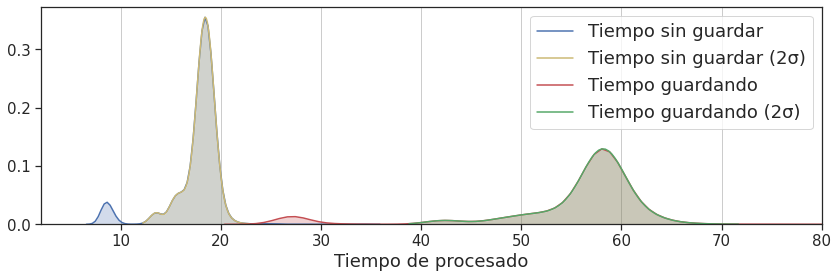

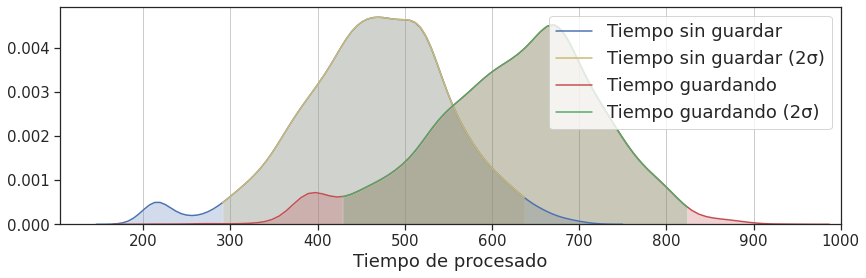

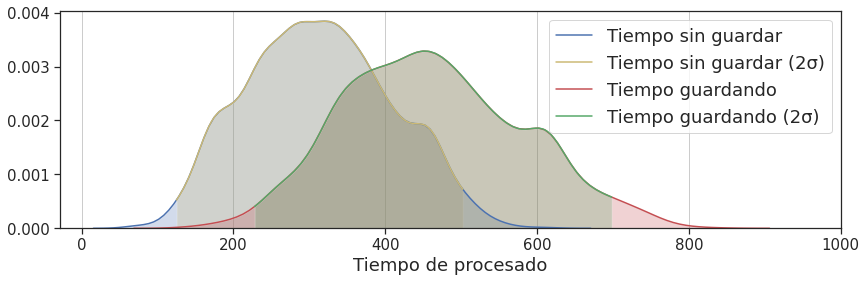

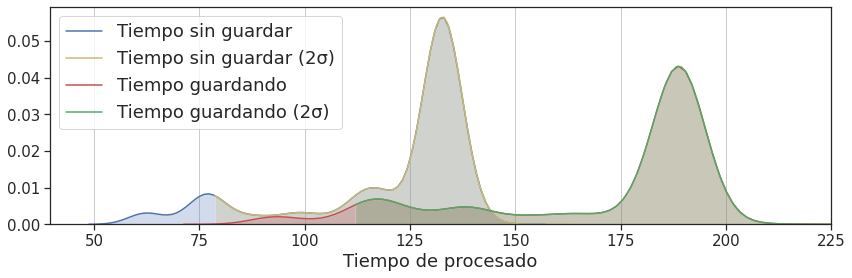

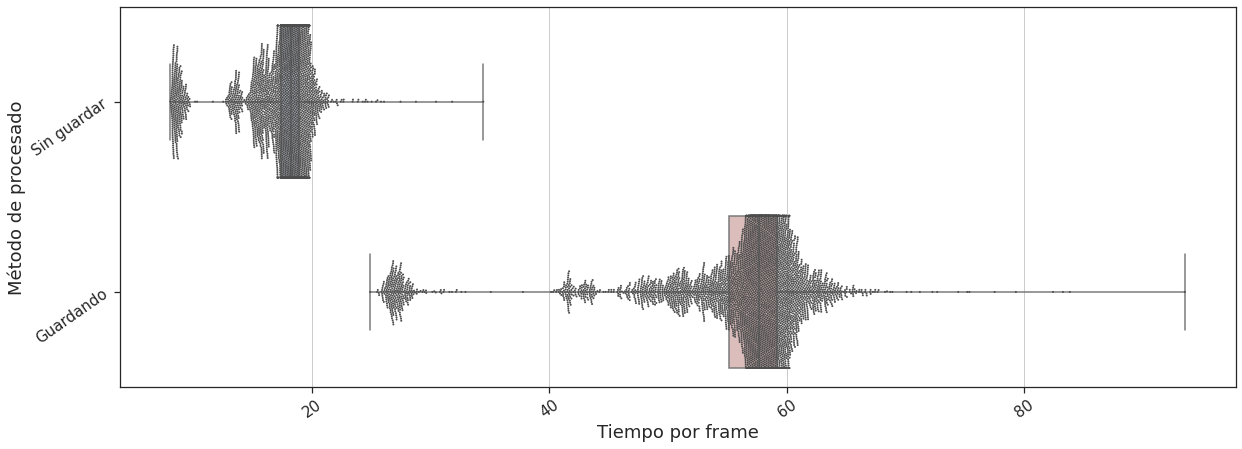

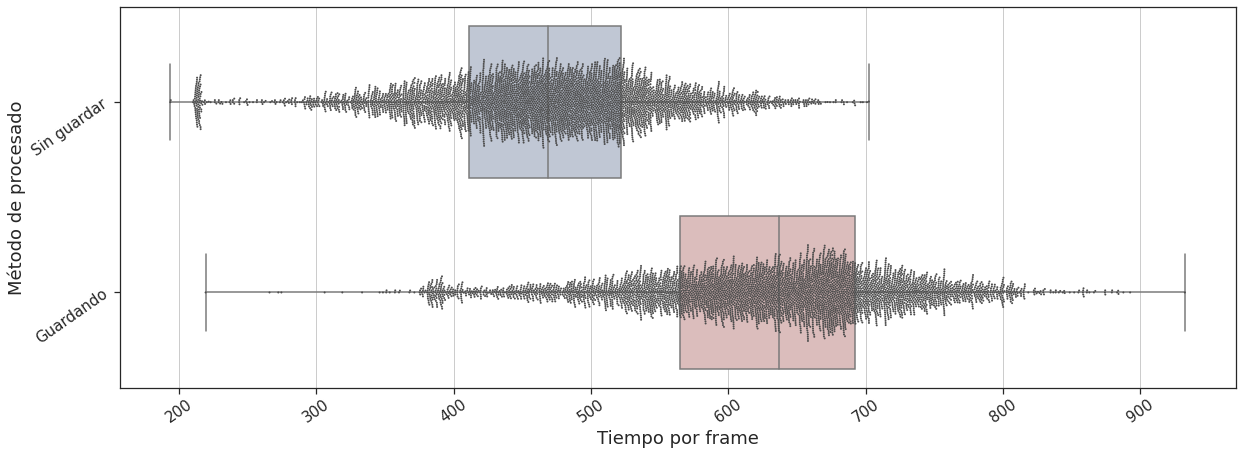

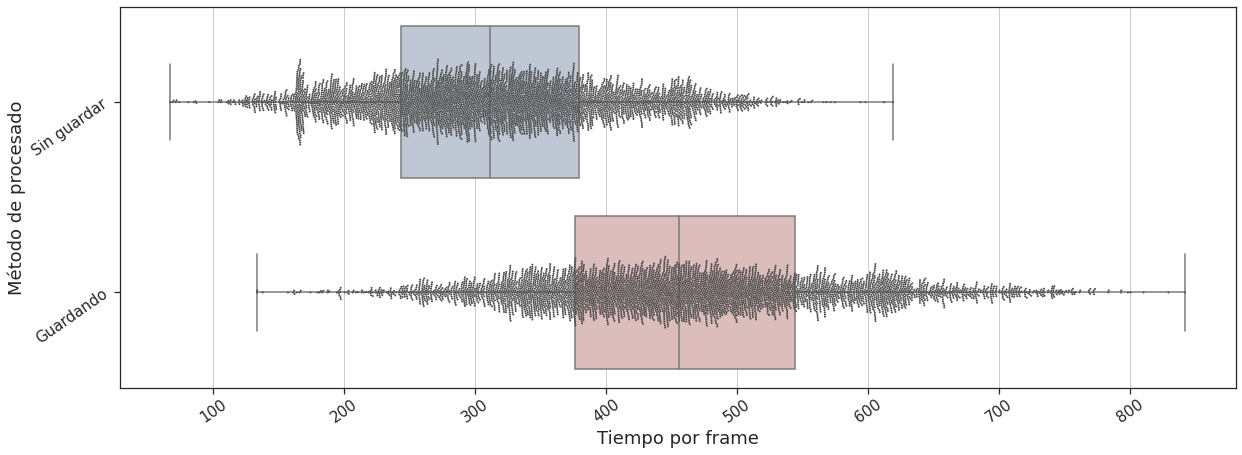

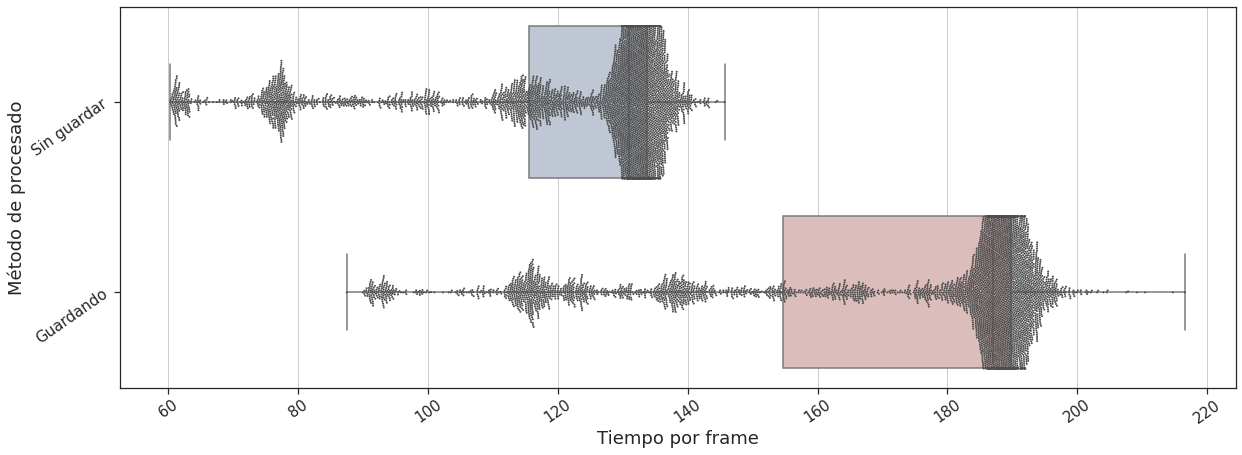

In [67]:
def todo():
    dfNoAct = createDF(medidas_sinaccion, guardado_sinaccion)
    dftotal = createDF(medidas_total, guardado_total)
    dfSinPre = createDF(medidas_pos, guardado_pos)
    dfSinPos = createDF(medidas_pre, guardado_pre)
    
    abarcamiento(dfNoAct, "TiemposSinAccionDist", max_=80)
    abarcamiento(dftotal, "TiemposSumadosDist", max_=1000)
    abarcamiento(dfSinPre, "TiemposModeloDist", max_=1000)
    abarcamiento(dfSinPos, "TiemposPrevioDist", max_=225)
    
    boxplot(dfNoAct, "TiemposSinAccion")
    boxplot(dftotal, "TiemposSumados")
    boxplot(dfSinPre, "TiemposModelo")
    boxplot(dfSinPos, "TiemposPrevio")
    
todo()

In [78]:
def describe():
    dfNoAct = createDF(medidas_sinaccion, guardado_sinaccion)
    dftotal = createDF(medidas_total, guardado_total)
    dfSinPre = createDF(medidas_pos, guardado_pos)
    dfSinPos = createDF(medidas_pre, guardado_pre)
    
    dic = {"Sin acciones": dfNoAct,
     "Total acciones": dftotal,
     "Solo modelo": dfSinPre,
     "Solo previo": dfSinPos}
    
    for d in dic:
        desc = dic[d].groupby(by="Tipo").describe()
        print(d)
        print(desc,"\n")
        desc.columns = desc.columns.droplevel(0)
        print("Workers con 15 fps")
        print((desc["mean"]+desc["std"]*2)*15/1000)
        print("\nWorkers con 5 fps")
        print((desc["mean"]+desc["std"]*2)*5/1000)
        print("\n","-"*100)
    

describe()

Sin acciones
            Tiempo por frame                                             \
                       count       mean       std        min        25%   
Tipo                                                                      
Guardando             4863.0  55.231969  8.221624  24.887256  55.089441   
Sin guardar           4863.0  17.527709  2.662144   8.039404  17.400305   

                                              
                   50%        75%        max  
Tipo                                          
Guardando    57.667407  59.194739  93.555249  
Sin guardar  18.245874  18.864648  34.422266   

Workers con 15 fps
Tipo
Guardando      1.075128
Sin guardar    0.342780
dtype: float64

Workers con 5 fps
Tipo
Guardando      0.358376
Sin guardar    0.114260
dtype: float64

 ----------------------------------------------------------------------------------------------------
Total acciones
            Tiempo por frame                                                 \
   